In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\mvk\Downloads\student_scores - student_scores.csv")

# Get simple Idea on the Data

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.duplicated().any()

False

# Handling Missing Values

In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Handling Outliers

In [9]:
#IQR
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR

Hours      4.7
Scores    45.0
dtype: float64

In [10]:
#Upper fence and Lower fence values of Data.
UF=(Q3 + 1.5 * IQR)
print(UF)


Hours      14.45
Scores    142.50
dtype: float64


In [11]:
LF=(Q1-1.5*IQR)
LF

Hours     -4.35
Scores   -37.50
dtype: float64

<AxesSubplot:>

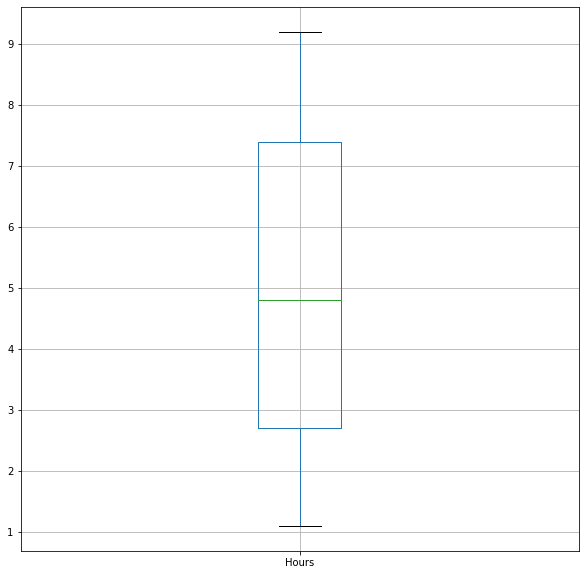

In [12]:
data.boxplot(column='Hours',figsize=(10,10))

<AxesSubplot:>

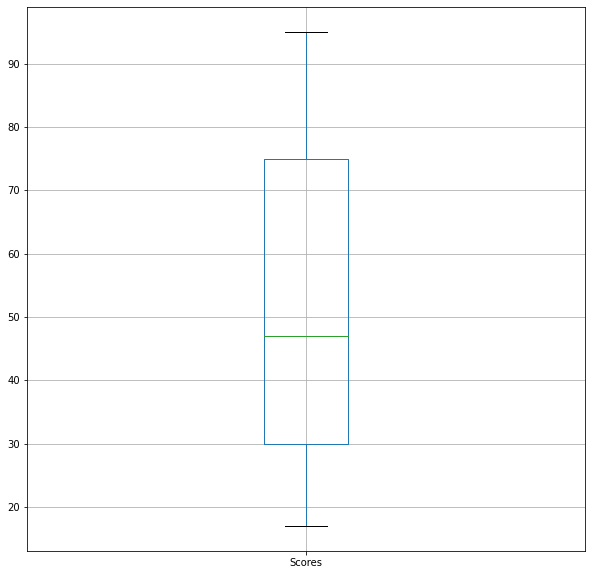

In [13]:
data.boxplot(column='Scores',figsize=(10,10))

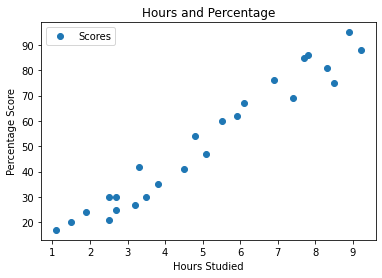

In [23]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours and Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
'''Here to see the positive linear relation between the number of hours 
studied and percentage of score'''

In [25]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [30]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42) 

In [31]:
print("xtrain",x_train.shape)
print("xtest",x_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)
print(len(x_train))
print(len(y_train))

xtrain (18, 1)
xtest (7, 1)
ytrain (18,)
ytest (7,)
18
18


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()

In [34]:
model=lr.fit(x_train,y_train)

In [35]:
ypred=model.predict(x_test)

In [36]:
y_test

array([81, 30, 21, 76, 62, 25, 42], dtype=int64)

In [37]:
ypred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

Text(0.5, 0, 'Scores')

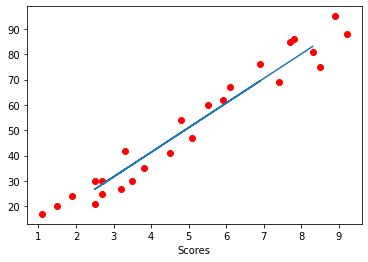

In [39]:
plt.scatter(X,y,color='r')
plt.plot(x_test,ypred)
plt.xlabel("Hours")
plt.xlabel("Scores")

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
print("MAE",mean_absolute_error(y_test,ypred))

MAE 4.4253946751561815


In [42]:
print("MSE",mean_squared_error(y_test,ypred))

MSE 23.516396034595214


In [43]:
from math import sqrt as sqrt
print("RMSE",sqrt(mean_squared_error(y_test,ypred)))

RMSE 4.849370684387327


In [44]:
r2=r2_score(y_test,ypred)
print("R^2(coefficient of determination, )",r2)

R^2(coefficient of determination, ) 0.9553509219739938
